In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
import seaborn as sns
from seaborn import kdeplot
from pylab import cm
from tqdm import tqdm

In [3]:
import pandas as pd
import os,sys

In [4]:
#######PLOTTING PARAMS########
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(10, 30))
plt.rc("axes",linewidth=4)
plt.rc("legend",fontsize=10,frameon=False)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.savefig('my_plot.png', dpi=400)  # Save with DPI of 400

<Figure size 4000x12000 with 0 Axes>

In [5]:
label = np.array(['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
       'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
       'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
       'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
       'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
       'Caco-2 permeability', 'PPB'])
binary = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False])

In [6]:
def Ticker(ax):
    """
    Styles the matplotlib axis..

    """
    from matplotlib.ticker import AutoMinorLocator
    minor_locator = AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minor_locator)
    minor_locator = AutoMinorLocator(2)
    ax.yaxis.set_minor_locator(minor_locator)
    return ax
plt.style.use("/home/suman/Dibyendu/DM_Projects/Project_SERB/NoteBooks/style.txt")
plt.rcParams['font.family'] = 'C059'

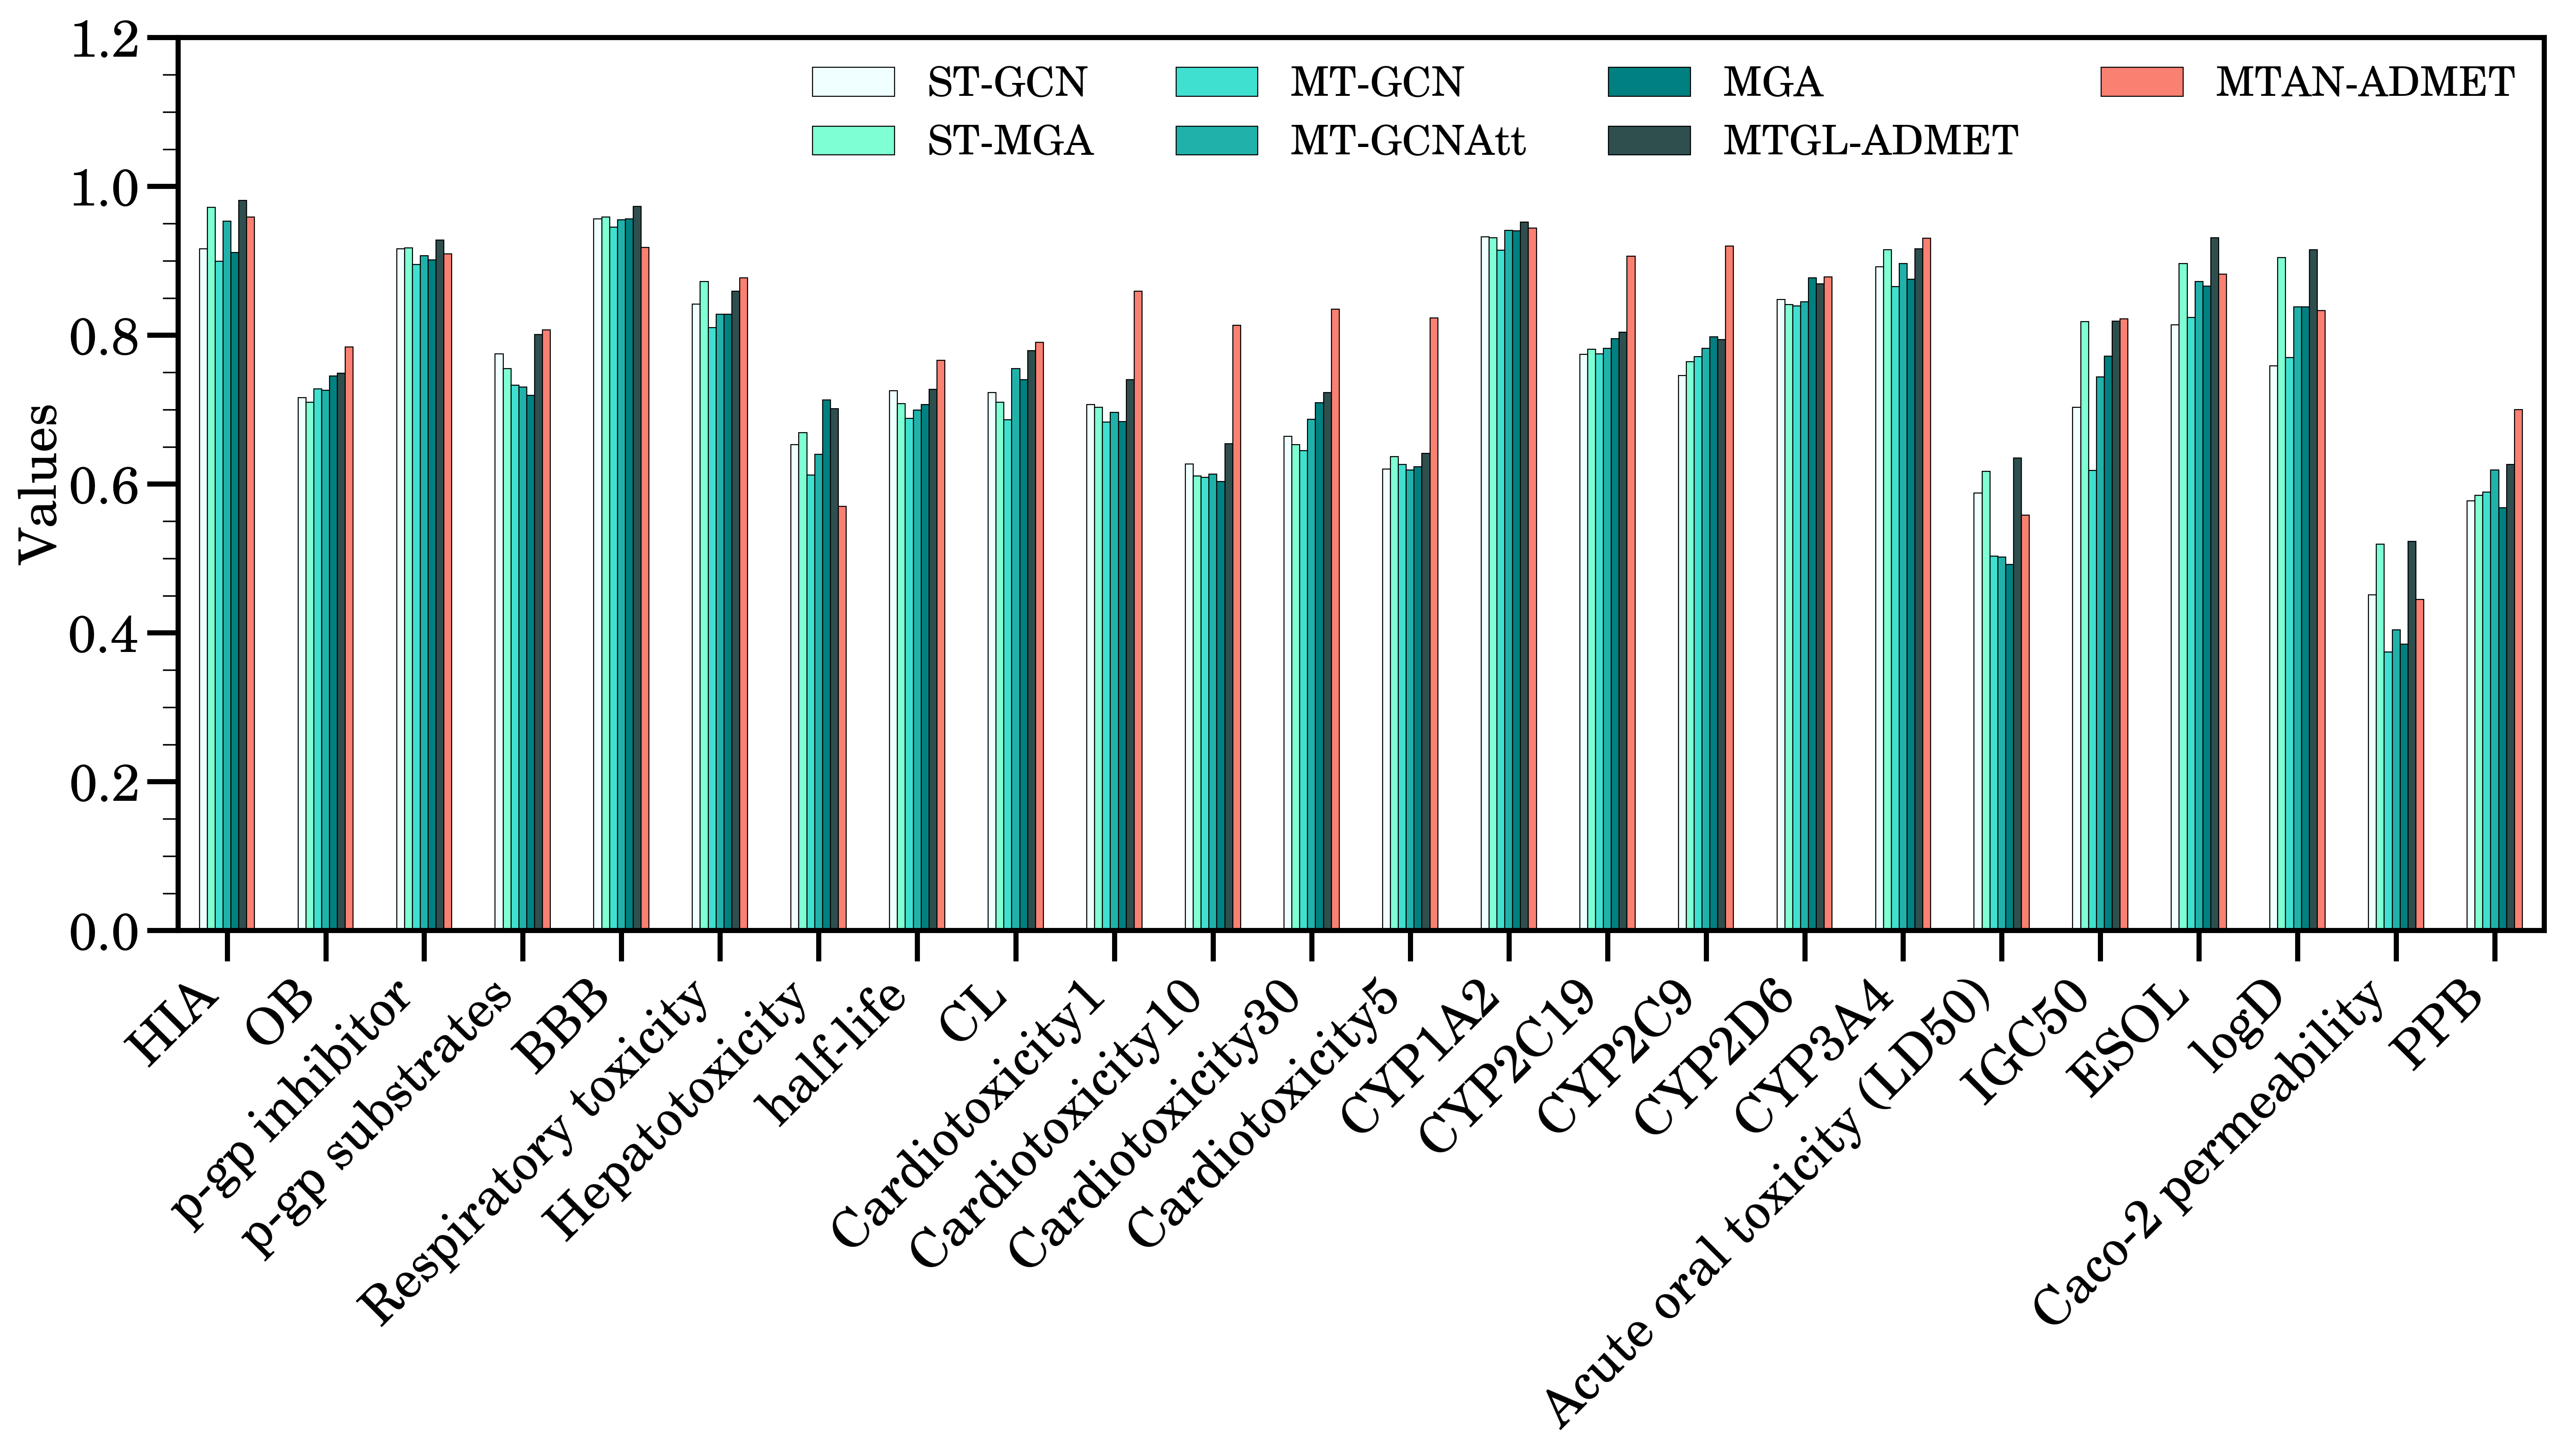

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# st-gcn
data1 = np.array([0.916,0.716,0.916,0.775,0.956,0.842,0.653,0.725,0.723,0.707,0.627,0.664,0.620,0.932,0.774,0.746,0.848,0.892,0.588,0.703,0.814,0.759,0.451,0.577])
# st-mga
data2 = np.array([0.972,0.710,0.917,0.755,0.959,0.872,0.669,0.708,0.710,0.703,0.611,0.653,0.637,0.931,0.781,0.764,0.841,0.915,0.617,0.818,0.896,0.904,0.519,0.585])
#mt-gcn
data3 = np.array([0.899,0.728,0.895,0.733,0.945,0.810,0.612,0.688,0.686,0.683,0.609,0.645,0.626,0.914,0.775,0.771,0.839,0.865,0.503,0.618,0.824,0.770,0.374,0.589])
#mt-gcnatt
data4 = np.array([0.953,0.726,0.907,0.730,0.955,0.828,0.640,0.699,0.755,0.696,0.613,0.687,0.619,0.941,0.782,0.782,0.845,0.896,0.502,0.744,0.872,0.838,0.404,0.619])
#mga
data5 = np.array([0.911,0.745,0.901,0.719,0.956,0.828,0.713,0.707,0.740,0.684,0.603,0.709,0.623,0.940,0.795,0.798,0.877,0.875,0.492,0.772,0.866,0.838,0.385,0.568])
# mtgl-admet
data6 = np.array([0.981,0.749,0.928,0.801,0.973,0.859,0.701,0.727,0.779,0.740,0.654,0.723,0.641,0.952,0.804,0.794,0.869,0.916,0.635,0.819,0.931,0.915,0.523,0.626])
#MTAN-ADMET
data7 = [
    0.959, 0.784, 0.909, 0.807, 0.918, 0.877, 0.570, 0.766, 0.790, 0.859,
    0.813, 0.835, 0.823, 0.944, 0.906, 0.920, 0.878, 0.930, 0.558, 0.822,
    0.882, 0.833, 0.445, 0.700
]


# X-axis labels (optional, could be task names, features, etc.)
labels = [f'{label[i]}' for i in range(24)]  # Ensure labels are defined for 24 tasks

# Define bar width and positions
bar_width = 0.08  # Adjusted bar width for seven datasets
index = np.arange(len(data1))

# Plot the bar plot
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars for all datasets
bar1 = ax.bar(index - 3 * bar_width, data1, bar_width, label='ST-GCN', color='azure')
bar2 = ax.bar(index - 2 * bar_width, data2, bar_width, label='ST-MGA', color='aquamarine')
bar3 = ax.bar(index - bar_width, data3, bar_width, label='MT-GCN', color='turquoise')
bar4 = ax.bar(index, data4, bar_width, label='MT-GCNAtt', color='lightseagreen')
bar5 = ax.bar(index + bar_width, data5, bar_width, label='MGA', color='teal')
bar6 = ax.bar(index + 2 * bar_width, data6, bar_width, label='MTGL-ADMET', color='darkslategray')
bar7 = ax.bar(index + 3 * bar_width, data7, bar_width, label='MTAN-ADMET', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Values', fontsize=20)
ax.set_xlim([-0.5, len(data1) - 0.5])
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=20)
ax.legend()
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', which='minor', bottom=False)

# Show the plot
# Add legend to the top-right corner with two columns
ax.legend(loc='upper right', fontsize=16, frameon=False, ncol=4)
plt.tight_layout()
plt.show()


In [8]:
# Original array
data = [
    706, 975, 1836, 732, 2186, 1367, 1212, 1112, 1126, 1493, 1493, 1493,
    1493, 9373, 10189, 9512, 10251, 10845, 7122, 1784, 1081, 1057, 3863, 1612
]

# Normalizing the data to range [0, 1]
normalized_data = -(data - np.min(data)) / (np.max(data) - np.min(data))
fraction_of_data = -(data/np.sum(data))

# Print normalized data
print(normalized_data)
print(fraction_of_data)

[ 0.         -0.02653122 -0.11145083 -0.00256436 -0.145971   -0.06519381
 -0.0499063  -0.0400434  -0.0414242  -0.07762107 -0.07762107 -0.07762107
 -0.07762107 -0.85481803 -0.93529934 -0.86852747 -0.94141434 -1.
 -0.63280402 -0.10632212 -0.0369859  -0.0346188  -0.31137193 -0.08935792]
[-0.00841348 -0.01161918 -0.0218798  -0.00872332 -0.02605079 -0.01629068
 -0.01444353 -0.01325182 -0.01341866 -0.01779224 -0.01779224 -0.01779224
 -0.01779224 -0.11169902 -0.12142338 -0.1133555  -0.12216224 -0.129241
 -0.08487362 -0.02126011 -0.01288239 -0.01259638 -0.04603578 -0.01921037]


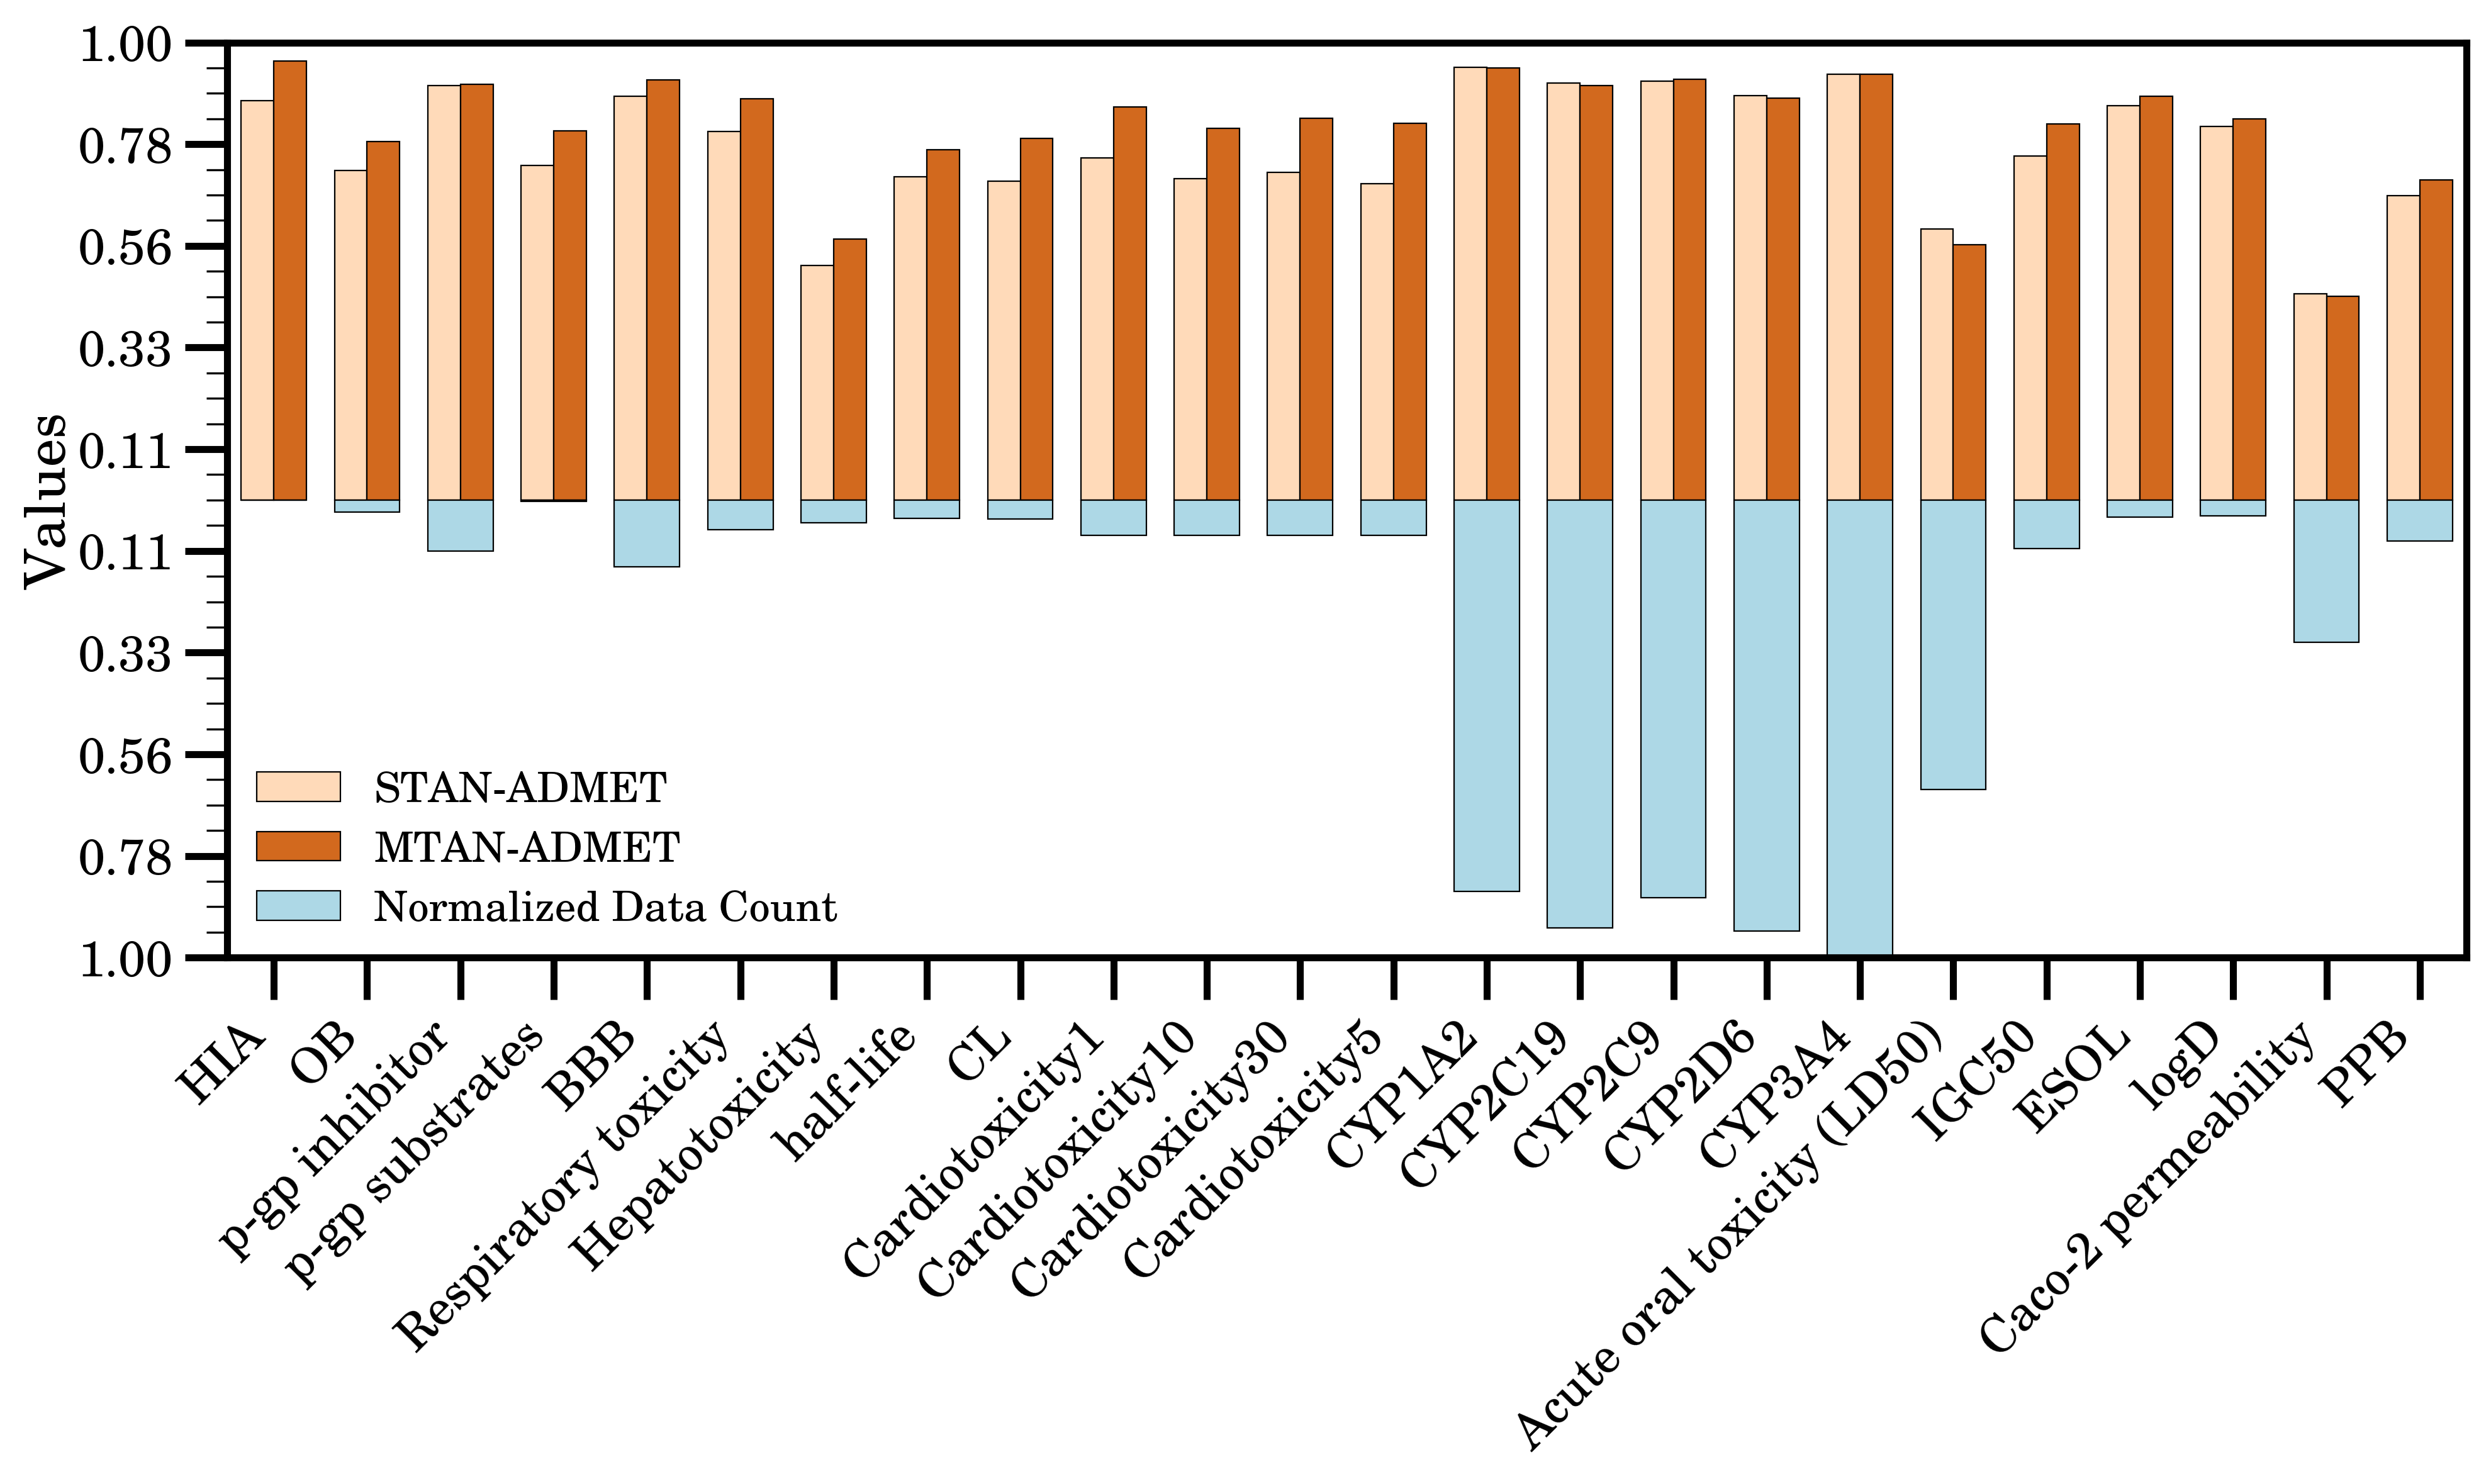

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Benchmark data (positive bars)
data1 = [
    0.8727, 0.7209, 0.9053, 0.7317, 0.8824, 0.8055, 0.5125, 0.7064,
    0.6967, 0.7480, 0.7026, 0.7166, 0.6919, 0.9453, 0.9119, 0.9152,
    0.8833, 0.9306, 0.5924, 0.7519, 0.8621, 0.8171, 0.4506, 0.6654
]

# Multitask data (positive bars)
data3 = [
    0.959, 0.784, 0.909, 0.807, 0.918, 0.877, 0.570, 0.766, 0.790, 0.859,
    0.813, 0.835, 0.823, 0.944, 0.906, 0.920, 0.878, 0.930, 0.558, 0.822,
    0.882, 0.833, 0.445, 0.700
]

# Negative direction data (absolute values for plotting, but displayed as negative)
# Negative direction data (adjust values based on use case)
neg_data = normalized_data

# X-axis labels
labels = [f'{label[i]}' for i in range(24)]

# Define bar width and positions
bar_width = 0.35
neg_bar_width = bar_width * 2  # Combine width for negative bars
index = np.arange(len(data1))

# Plot the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for data1 and data3 (positive bars)
bar1 = ax.bar(index - bar_width/2, data1, bar_width, label='STAN-ADMET', color='peachpuff')
bar3 = ax.bar(index + bar_width/2, data3, bar_width, label='MTAN-ADMET', color='chocolate')

# Create negative bars using absolute values but display as negative
neg_bar = ax.bar(index, neg_data, neg_bar_width, label='Normalized Data Count', color='lightblue')

# Add labels, title, and legend
ax.set_ylabel('Values', fontsize=16)
ax.set_xlim([-0.5, len(data1) - 0.5])
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=14)
ax.legend()
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.set_ylim([-1,1])
# Customize y-ticks to show positive values for the negative data
y_ticks = np.linspace(-1,1,10)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{abs(tick):.2f}' for tick in y_ticks])

# Show the plot
plt.rc("legend", fontsize=12, frameon=False)
plt.tight_layout()
plt.show()
